In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import modules as mod

### Global parameters

In [5]:
# Number of market participants 
N = 1600 

# Number of fundamentalists and chartists
N_FUND = 800
N_CHART = 800

# Initial price of the asset traded
P_0 = 100

# Global fundamental price 
P_F = 120

# Variation around the global fundamental price 
THETA = 30

# Maximum extension for chartists' timesteps window 
T_MAX = 15

# Sensitivity of forecasts for fundamentalists
PHI = 2.0

# Sensitivity of forecasts for chartists 
KAPPA = 2.0

# level of information dissipation among the agents
ALPHA = 0.95

# Weight of the market imbalance
DELTA = 0.05

# Intervals of variation for the stochastic noise term 
SIGMA = 30

# Sensitivity threshold for choosing the status
TAO = 20

# Asset quantity for each trader
Q = 50

# Initializing traders' wealth (W), money (M), and asset quantity(Q)
M = 35000  
Q = 50 
W = [M + Q * P_0 for _ in range(N)] 

In [6]:
# Function to calculate expected price for one fundamentalist
def ep_fundamentalist(p_t, P_F):
    """
    Calculate the expected price for a fundamentalist trader

    Parameters:
    p_t (float): The current market price of the asset
    p_f (float): The perceived fundamental price of the asset for the trader

    Returns:
    float: The expected price for the asset for a fundamentalist trader
    """
    noise = np.random.uniform(-SIGMA, SIGMA)
    # Was not too sure about using an uniform or normal distribution here
    p_f = np.random.uniform(P_F - THETA, P_F + THETA)
    return p_t + PHI * (p_f - p_t) + noise

# Function to calculate expected price for one chartist
def ep_chartist(p_t, past_prices):
    """
    Calculate the expected price for a chartist trader

    Parameters:
    p_t (float): The current market price of the asset
    past_prices (list of float): A list of past market prices of the asset

    Returns:
    float: The expected price for the asset as calculated by a chartist trader
    """
    assert len(past_prices) == T_MAX, "past_prices must be a list of 15 values"
    chartist_T = np.random.randint(2, T_MAX)
    p_T = np.mean(past_prices[:chartist_T]) 
    noise = np.random.uniform(-SIGMA, SIGMA)
    return p_t + KAPPA/(chartist_T) * (p_t - p_T) + noise

# Function that determines the choice one random trader makes
def rand_trader():
    choice = np.random.randint(0, 3)
    return choice
    

### 

In [7]:
# Function to calculate the order type for a non-random trader
def determine_order_type(expected_price, p_t, TAO, money, asset_quantity):
    """
    Determine the order type of a trader based on the expected price, current price,
    sensitivity threshold, available money, and asset quantity

    Parameters:
    expected_price (float): The expected price of the asset
    p_t (float): The current market price of the asset
    TAO (int): The threshold to decide whether to hold
    money (float): The amount of money the trader has
    asset_quantity (int): The quantity of the asset the trader holds

    Returns:
    str: The order type ('buy', 'sell', or 'hold')
    """
    if expected_price - p_t < TAO:
        return 'hold'
    elif expected_price > p_t and money > 0:
        return 'buy'
    elif expected_price < p_t and asset_quantity > 0:
        return 'sell'
    else:
        return 'hold'

def set_order_price(order_type, expected_price, current_price, money):
    """
    Set the order price for a trader based on their order type, expected price,
    current price, and the amount of money they have

    Parameters:
    order_type (str): The type of order ('buy', 'sell', or 'hold')
    expected_price (float): The expected price of the asset
    current_price (float): The current market price of the asset
    money (float): The amount of money the trader has
    
    Returns:
    float: The price set for the order
    """
    if order_type == 'buy':
        return np.random.uniform(0, min(money, expected_price))
    elif order_type == 'sell':
        return np.random.uniform(expected_price, current_price)
    else:
        return None

In [8]:
# Example usage
current_market_price = P_0
trader_money = M
trader_asset_quantity = Q

ep = ep_fundamentalist(current_market_price, P_F) 
order_type = determine_order_type(ep, P_0, TAO, trader_money, trader_asset_quantity)
order_price = set_order_price(order_type, ep, current_market_price, trader_money)

print(ep)
print(order_type)
print(order_price)

167.24274384238737
buy
66.64473875022492


In [38]:
current_market_price = P_0
trader_money = M
trader_asset_quantity = Q
ob = OrderBook(DELTA)
asset_price = [current_market_price]
for t in range(100):
    for i in range(800):
        ep = ep_fundamentalist(current_market_price, P_F) 
        order_type = determine_order_type(ep, current_market_price, TAO, trader_money, trader_asset_quantity)
        order_price = set_order_price(order_type, ep, current_market_price, trader_money)
        print(order_type)
        if order_type == "buy":
            ob.place_bid(i, order_price)
        elif order_type == "sell":
            ob.place_ask(i, order_price)
    current_market_price = ob.set_aggregate_price(current_market_price, ob.N_a, ob.N_b)
    asset_price.append(current_market_price)

hold
buy
hold
hold
buy
buy
buy
buy
hold
hold
buy
hold
buy
buy
buy
buy
buy
buy
hold
buy
buy
hold
hold
buy
hold
buy
buy
buy
hold
hold
buy
buy
buy
hold
hold
hold
buy
buy
buy
buy
buy
buy
buy
buy
buy
buy
hold
buy
buy
hold
buy
hold
buy
buy
buy
hold
buy
hold
buy
buy
hold
buy
buy
buy
buy
hold
buy
buy
buy
buy
buy
hold
buy
buy
buy
buy
buy
hold
hold
buy
buy
buy
hold
buy
buy
buy
hold
buy
buy
hold
buy
buy
buy
buy
buy
hold
buy
buy
buy
hold
hold
hold
hold
buy
hold
hold
hold
buy
buy
buy
hold
hold
hold
buy
buy
hold
hold
buy
buy
buy
buy
buy
buy
buy
buy
hold
hold
buy
buy
buy
buy
buy
hold
buy
buy
buy
buy
hold
buy
buy
buy
buy
hold
hold
buy
buy
buy
buy
buy
buy
buy
buy
buy
hold
buy
buy
buy
hold
buy
buy
buy
hold
buy
hold
buy
buy
hold
hold
hold
buy
buy
hold
buy
buy
buy
hold
hold
buy
buy
buy
hold
buy
hold
buy
buy
hold
hold
buy
buy
hold
buy
hold
buy
buy
buy
buy
buy
hold
buy
buy
hold
buy
buy
buy
buy
hold
hold
buy
hold
hold
buy
hold
hold
buy
buy
buy
buy
buy
buy
buy
buy
buy
buy
buy
buy
hold
hold
buy
buy
hold
buy
bu

In [36]:
t = list(range(0,101))

In [35]:
len(asset_price), len(t)

TypeError: object of type 'int' has no len()

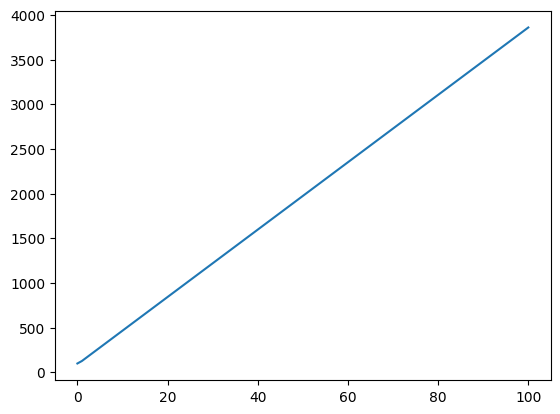

In [37]:
plt.plot(t, asset_price)

In [9]:
class OrderBook:
    def __init__(self, delta, agents_dict):
        """
        Initialize the OrderBook with the given delta value.

        Parameters:
        - delta (float): Parameter for price adjustment.
        """
        self.bids = []  # List to store bid orders
        self.asks = []  # List to store ask orders
        self.delta = delta  # Parameter for price adjustment
        self.agents_dict = agents_dict
        self.N_a = 0
        self.N_b = 0
        self.N_T = 0
        

    def place_bid(self, trader_id, price, assets, money):
        """
        Place a bid order in the order book.

        Parameters:
        - trader_id (int): ID of the trader placing the bid.
        - price (float): Bid price.
        """
        self.bids.append({'trader_id': trader_id, 'price': price, 'assets':assets, 'money':money})
        self.N_b += 1  # Increment the number of bidders
        
    def place_ask(self, trader_id, price,assets, money):
        """
        Place an ask order in the order book.

        Parameters:
        - trader_id (int): ID of the trader placing the ask.
        - price (float): Ask price.
        """
        self.asks.append({'trader_id': trader_id, 'price': price, 'assets':assets, 'money':money})
        self.N_a += 1                               # Increment the number of askers
        


    def match_orders(self):
        """
        Match bid and ask orders in the order book.

        Returns:
        - list: List of dictionaries representing matched transactions.
        """
        self.bids.sort(key=lambda x: x['price'], reverse=True)
        self.asks.sort(key=lambda x: x['price'])
        
        N_T = 0 
        while self.bids and self.asks:
            best_bid = self.bids[0]
            best_ask = self.asks[0]

            if best_bid['price'] >= best_ask['price']:
                # Remove matched orders
                p_L = self.asks[0]['price']
                self.agents_dict[self.asks[0]['trader_id']][3] -= 1 ## assets
                self.agents_dict[self.bids[0]['trader_id']][3] += 1 
                self.agents_dict[self.asks[0]['trader_id']][2] += p_L  
                self.agents_dict[self.bids[0]['trader_id']][2] -= p_L
                self.bids.pop(0)
                self.asks.pop(0)
                self.N_b -= 1
                self.N_a -= 1
                N_T += 1
                
            else:
                break  # No more possible transactions

        return N_T, p_L

    def set_aggregate_price(self, prev_price, N_a, N_b):
        """
        Set the aggregate asset price at time t + 1 based on different cases.

        Parameters:
        - prev_price (float): Previous global asset price at time t.
        - N_a (int): Number of askers in the order book.
        - N_b (int): Number of bidders in the order book.

        Returns:
        - float: New global asset price at time t + 1.
        """

        if N_a == 0 and N_b > 0:
            new_price = prev_price + self.delta * N_b
            
        elif N_a > 0 and N_b == 0:
            new_price = prev_price - self.delta * N_a
            
        elif 0 < N_a < N_b and self.bids[0]['price'] < self.asks[0]['price']:
            new_price = prev_price + self.delta * N_b
            
        elif 0 < N_a < N_b and self.bids[0]['price'] > self.asks[0]['price']:
            N_T,p_L = self.match_orders()
            new_price = p_L + self.delta * (N_b - N_T)
            
        elif 0 < N_b < N_a and self.bids[0]['price'] <= self.asks[0]['price']:
            new_price = prev_price - self.delta * N_a
            
        elif 0 < N_b < N_a and self.bids[0]['price'] > self.asks[0]['price']:
            N_T, p_L = self.match_orders()
            new_price = p_L - self.delta * (N_a - N_T)
            

        return new_price
